# Week2- content-based

## 基礎建設

In [2]:
import pandas as pd
import gzip, json

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

## 載入資料

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import datetime

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/All_Beauty.csv
!wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_All_Beauty.json.gz

In [ ]:
# colab版
metadata = getDF('/content/meta_All_Beauty.json.gz')
ratings = pd.read_csv('/content/All_Beauty.csv', names=['asin', 'reviewerID', 'overall', 'unixReviewTime'], header=None)

In [4]:
# 本地端版
# metadata = getDF('meta_All_Beauty.json.gz')
# ratings = pd.read_csv('All_Beauty.csv', names=['asin', 'reviewerID', 'overall', 'unixReviewTime'], header=None)

In [5]:
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [6]:
ratings.head()

,asin,reviewerID,overall,unixReviewTime
0,0143026860,A1V6B6TNIC10QE,1.0,1424304000
1,0143026860,A2F5GHSXFQ0W6J,4.0,1418860800
2,0143026860,A1572GUYS7DGSR,4.0,1407628800
3,0143026860,A1PSGLFK1NSVO,5.0,1362960000
4,0143026860,A6IKXKZMTKGSC,5.0,1324771200


In [6]:
metadata.shape, ratings.shape

((32892, 19), (371345, 4))

In [7]:
# 資料清洗
metadata = metadata.applymap(lambda x: str(x).replace('[]','') if len(x)<1 else x)
metadata.replace('', np.nan, inplace = True)
metadata

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,NaN,NaN,[Loud 'N Clear Personal Sound Amplifier allows...,NaN,Loud 'N Clear&trade; Personal Sound Amplifier,NaN,NaN,idea village,NaN,"2,938,573 in Beauty & Personal Care (",NaN,{'ASIN: ': '6546546450'},All Beauty,NaN,NaN,NaN,6546546450,NaN,NaN
1,NaN,NaN,[No7 Lift & Luminate Triple Action Serum 50ml ...,NaN,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",NaN,NaN,NaN,"872,854 in Beauty & Personal Care (",NaN,"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$44.99,7178680776,NaN,NaN
2,NaN,NaN,[No7 Stay Perfect Foundation now stays perfect...,NaN,No7 Stay Perfect Foundation Cool Vanilla by No7,NaN,NaN,No7,NaN,"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,NaN,NaN,$28.76,7250468162,NaN,NaN
3,NaN,NaN,NaN,NaN,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],NaN,NaN,NaN,"1,870,258 in Beauty & Personal Care (",NaN,"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,NaN,NaN,NaN,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,NaN,NaN,[Lacto Calamine Skin Balance Daily Nourishing ...,NaN,Lacto Calamine Skin Balance Oil control 120 ml...,NaN,NaN,Pirmal Healthcare,NaN,"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,NaN,NaN,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32887,NaN,NaN,NaN,NaN,"Barielle Pro Textured Grip Cuticle Nipper, Purple",NaN,NaN,NaN,NaN,"2,145,325 in Beauty & Personal Care (",NaN,{'ASIN: ': 'B01HIWLLUK'},All Beauty,NaN,NaN,$9.95,B01HIWLLUK,NaN,NaN
32888,NaN,NaN,NaN,NaN,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,NaN,NaN,Salon Perfect,NaN,"1,639,713 in Beauty & Personal Care (",NaN,"{'ASIN: ': 'B01HJ1K3YK', 'UPC:': '671635851871'}",All Beauty,NaN,NaN,NaN,B01HJ1K3YK,NaN,NaN
32889,NaN,NaN,NaN,NaN,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,"[B01KON9B4S, B079X3YFXS, B00M79OYS6, B000JN4CR...",NaN,NaN,NaN,"207,410 in Beauty & Personal Care (","[B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...","{'Shipping Weight:': '1 pounds (', 'ASIN: ': '...",All Beauty,NaN,NaN,$55.63,B01HJ84SGM,NaN,NaN
32890,NaN,NaN,[Brand new and high quality<br> Enables fast v...,NaN,12 White Feather Shuttlecocks Birdies Badminto...,NaN,NaN,GBSTORE,NaN,"965,673 in Beauty & Personal Care (",NaN,"{'Shipping Weight:': '4.8 ounces (', 'ASIN: ':...",All Beauty,NaN,NaN,$12.99,B01HJASD20,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [8]:
# 觀察空值分布狀況
metadata.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32892 entries, 0 to 32891
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         0 non-null      float64
 1   tech1            10 non-null     object 
 2   description      15119 non-null  object 
 3   fit              0 non-null      float64
 4   title            32891 non-null  object 
 5   also_buy         6597 non-null   object 
 6   tech2            0 non-null      float64
 7   brand            17219 non-null  object 
 8   feature          269 non-null    object 
 9   rank             32515 non-null  object 
 10  also_view        8132 non-null   object 
 11  details          32892 non-null  object 
 12  main_cat         32892 non-null  object 
 13  similar_item     1304 non-null   object 
 14  date             19 non-null     object 
 15  price            11459 non-null  object 
 16  asin             32892 non-null  object 
 17  imageURL    

C:\windows\Temp/ipykernel_6988/3947379168.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  metadata.info(verbose=True, null_counts=True)


In [9]:
# 選擇所需欄位
metadata_part = metadata[['description','title','also_buy','brand','rank','also_view','price','asin']]
metadata_part

,description,title,also_buy,brand,rank,also_view,price,asin
0,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,NaN,idea village,"2,938,573 in Beauty & Personal Care (",NaN,NaN,6546546450
1,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",NaN,"872,854 in Beauty & Personal Care (",NaN,$44.99,7178680776
2,[No7 Stay Perfect Foundation now stays perfect...,No7 Stay Perfect Foundation Cool Vanilla by No7,NaN,No7,"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]",$28.76,7250468162
3,NaN,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],NaN,"1,870,258 in Beauty & Personal Care (",NaN,NaN,7367905066
4,[Lacto Calamine Skin Balance Daily Nourishing ...,Lacto Calamine Skin Balance Oil control 120 ml...,NaN,Pirmal Healthcare,"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...",$12.15,7414204790
...,...,...,...,...,...,...,...,...
32887,NaN,"Barielle Pro Textured Grip Cuticle Nipper, Purple",NaN,NaN,"2,145,325 in Beauty & Personal Care (",NaN,$9.95,B01HIWLLUK
32888,NaN,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,NaN,Salon Perfect,"1,639,713 in Beauty & Personal Care (",NaN,NaN,B01HJ1K3YK
32889,NaN,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,"[B01KON9B4S, B079X3YFXS, B00M79OYS6, B000JN4CR...",NaN,"207,410 in Beauty & Personal Care (","[B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...",$55.63,B01HJ84SGM
32890,[Brand new and high quality<br> Enables fast v...,12 White Feather Shuttlecocks Birdies Badminto...,NaN,GBSTORE,"965,673 in Beauty & Personal Care (",NaN,$12.99,B01HJASD20


In [10]:
# 去重複
metadata_clean = metadata_part.drop_duplicates(['asin'])
print(f'origin {len(metadata_part)}, data without duplicate {len(metadata_clean)}')

origin 32892, data without duplicate 32488


## 資料整理

In [11]:
ratings['DATE'] = pd.to_datetime(ratings['unixReviewTime'], unit='s')

In [12]:
metadata_clean['rank_num'] = metadata_clean['rank'].str.split(expand=True)[0].str.replace(',','').fillna(99999999999)
metadata_clean['rank_num'] = pd.to_numeric(metadata_clean['rank_num'])
metadata_clean['rank_category'] = metadata_clean['rank'].str.split("in ", expand=True)[1].str.replace(r"\(","", regex=True).replace(r"\&amp;","&",regex=True)
metadata_clean

C:\windows\Temp/ipykernel_6988/2868520035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_clean['rank_num'] = metadata_clean['rank'].str.split(expand=True)[0].str.replace(',','').fillna(99999999999)
C:\windows\Temp/ipykernel_6988/2868520035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_clean['rank_num'] = pd.to_numeric(metadata_clean['rank_num'])
C:\windows\Temp/ipykernel_6988/2868520035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,description,title,also_buy,brand,rank,also_view,price,asin,rank_num,rank_category
0,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,NaN,idea village,"2,938,573 in Beauty & Personal Care (",NaN,NaN,6546546450,2938573,Beauty & Personal Care
1,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",NaN,"872,854 in Beauty & Personal Care (",NaN,$44.99,7178680776,872854,Beauty & Personal Care
2,[No7 Stay Perfect Foundation now stays perfect...,No7 Stay Perfect Foundation Cool Vanilla by No7,NaN,No7,"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]",$28.76,7250468162,956696,Beauty & Personal Care
3,NaN,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],NaN,"1,870,258 in Beauty & Personal Care (",NaN,NaN,7367905066,1870258,Beauty & Personal Care
4,[Lacto Calamine Skin Balance Daily Nourishing ...,Lacto Calamine Skin Balance Oil control 120 ml...,NaN,Pirmal Healthcare,"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...",$12.15,7414204790,67701,Beauty & Personal Care
...,...,...,...,...,...,...,...,...,...,...
32887,NaN,"Barielle Pro Textured Grip Cuticle Nipper, Purple",NaN,NaN,"2,145,325 in Beauty & Personal Care (",NaN,$9.95,B01HIWLLUK,2145325,Beauty & Personal Care
32888,NaN,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,NaN,Salon Perfect,"1,639,713 in Beauty & Personal Care (",NaN,NaN,B01HJ1K3YK,1639713,Beauty & Personal Care
32889,NaN,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,"[B01KON9B4S, B079X3YFXS, B00M79OYS6, B000JN4CR...",NaN,"207,410 in Beauty & Personal Care (","[B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...",$55.63,B01HJ84SGM,207410,Beauty & Personal Care
32890,[Brand new and high quality<br> Enables fast v...,12 White Feather Shuttlecocks Birdies Badminto...,NaN,GBSTORE,"965,673 in Beauty & Personal Care (",NaN,$12.99,B01HJASD20,965673,Beauty & Personal Care


In [13]:
metadata_clean['price_str'] = metadata_clean["price"].str.split("$",expand = True)[1]
metadata_clean['price_str'] = metadata_clean["price_str"].str.replace(',', '')
metadata_clean['price_str'] = metadata_clean["price_str"].str.replace(' - ', '')
metadata_clean['price_clean'] = pd.to_numeric(metadata_clean['price_str'])
metadata_clean

C:\windows\Temp/ipykernel_6988/2918018536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_clean['price_str'] = metadata_clean["price"].str.split("$",expand = True)[1]
C:\windows\Temp/ipykernel_6988/2918018536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_clean['price_str'] = metadata_clean["price_str"].str.replace(',', '')
C:\windows\Temp/ipykernel_6988/2918018536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,description,title,also_buy,brand,rank,also_view,price,asin,rank_num,rank_category,price_str,price_clean
0,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,NaN,idea village,"2,938,573 in Beauty & Personal Care (",NaN,NaN,6546546450,2938573,Beauty & Personal Care,NaN,NaN
1,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",NaN,"872,854 in Beauty & Personal Care (",NaN,$44.99,7178680776,872854,Beauty & Personal Care,44.99,44.99
2,[No7 Stay Perfect Foundation now stays perfect...,No7 Stay Perfect Foundation Cool Vanilla by No7,NaN,No7,"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]",$28.76,7250468162,956696,Beauty & Personal Care,28.76,28.76
3,NaN,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],NaN,"1,870,258 in Beauty & Personal Care (",NaN,NaN,7367905066,1870258,Beauty & Personal Care,NaN,NaN
4,[Lacto Calamine Skin Balance Daily Nourishing ...,Lacto Calamine Skin Balance Oil control 120 ml...,NaN,Pirmal Healthcare,"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...",$12.15,7414204790,67701,Beauty & Personal Care,12.15,12.15
...,...,...,...,...,...,...,...,...,...,...,...,...
32887,NaN,"Barielle Pro Textured Grip Cuticle Nipper, Purple",NaN,NaN,"2,145,325 in Beauty & Personal Care (",NaN,$9.95,B01HIWLLUK,2145325,Beauty & Personal Care,9.95,9.95
32888,NaN,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,NaN,Salon Perfect,"1,639,713 in Beauty & Personal Care (",NaN,NaN,B01HJ1K3YK,1639713,Beauty & Personal Care,NaN,NaN
32889,NaN,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,"[B01KON9B4S, B079X3YFXS, B00M79OYS6, B000JN4CR...",NaN,"207,410 in Beauty & Personal Care (","[B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...",$55.63,B01HJ84SGM,207410,Beauty & Personal Care,55.63,55.63
32890,[Brand new and high quality<br> Enables fast v...,12 White Feather Shuttlecocks Birdies Badminto...,NaN,GBSTORE,"965,673 in Beauty & Personal Care (",NaN,$12.99,B01HJASD20,965673,Beauty & Personal Care,12.99,12.99


In [15]:
metadata_clean.dtypes

description       object
title             object
also_buy          object
brand             object
rank              object
also_view         object
price             object
asin              object
rank_num           int64
rank_category     object
price_str         object
price_clean      float64
dtype: object

In [16]:
category = metadata_clean["rank_category"].value_counts().rename_axis('name').reset_index(name='counts')
category

,name,counts
0,Beauty & Personal Care,32015
1,Grocery & Gourmet Food,37
2,Health & Household,21
3,Sports & Outdoors,3
4,Toys & Games,3
5,Baby,2
6,"Clothing, Shoes & Jewelry",2
7,Home & Kitchen,1
8,Automotive,1
9,Tools & Home Improvement,1


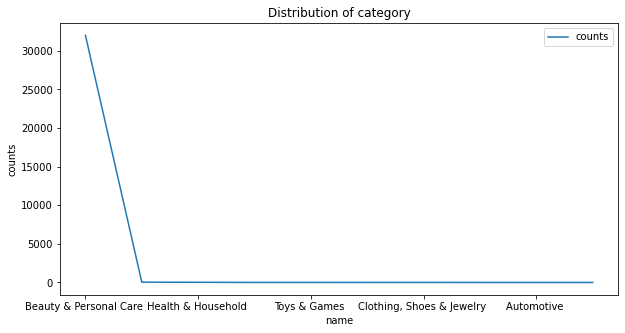

In [17]:
category.set_index('name', inplace=True)
chart = category.plot(title='Distribution of category',  #圖表標題
                    xlabel='name',  #x軸說明文字
                    ylabel='counts',  #y軸說明文字
                    legend=True,  # 是否顯示圖例
                    figsize=(10, 5))  # 圖表大小
plt.show()

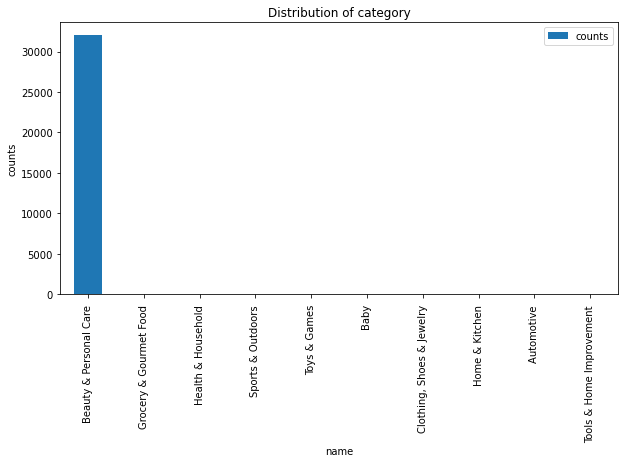

In [18]:
# category.set_index('name', inplace=True)
chart = category.plot(kind='bar',  #圖表類型
                    title='Distribution of category',
                    xlabel='name',  
                    ylabel='counts',  
                    legend=True, 
                    figsize=(10, 5))  
plt.show()

In [19]:
price = metadata_clean["price_clean"].value_counts().rename_axis('price').reset_index(name='counts')
price

,price,counts
0,9.99,214
1,19.99,145
2,8.99,141
3,7.99,133
4,12.99,125
...,...,...
3520,93.64,1
3521,22.86,1
3522,30.42,1
3523,3.52,1


In [20]:
price.dtypes

price     float64
counts      int64
dtype: object

In [21]:
print(price["price"].max(), "  ", price["price"].min())

2149.0    0.01


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'counts'}>]], dtype=object)

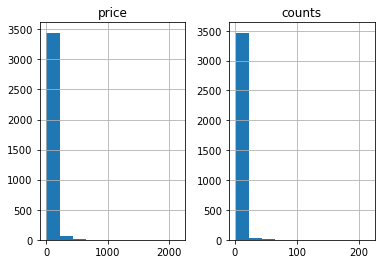

In [22]:
price.hist()

In [23]:
brand = metadata_clean["brand"].value_counts().rename_axis('brand').reset_index(name='counts')
brand

,brand,counts
0,VAGA,252
1,L'Oreal Paris,110
2,Betty Dain,82
3,Unknown,79
4,EG GIFTS,79
...,...,...
7857,Pielor,1
7858,Nature's Kiss,1
7859,Teenage Mutant Ninja Turtles,1
7860,Nikken,1


In [24]:
metadata_clean.replace(np.nan, ' ', inplace = True)
metadata_clean

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,description,title,also_buy,brand,rank,also_view,price,asin,rank_num,rank_category,price_str,price_clean
0,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,,idea village,"2,938,573 in Beauty & Personal Care (",,,6546546450,2938573,Beauty & Personal Care,,
1,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,"872,854 in Beauty & Personal Care (",,$44.99,7178680776,872854,Beauty & Personal Care,44.99,44.99
2,[No7 Stay Perfect Foundation now stays perfect...,No7 Stay Perfect Foundation Cool Vanilla by No7,,No7,"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]",$28.76,7250468162,956696,Beauty & Personal Care,28.76,28.76
3,,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,"1,870,258 in Beauty & Personal Care (",,,7367905066,1870258,Beauty & Personal Care,,
4,[Lacto Calamine Skin Balance Daily Nourishing ...,Lacto Calamine Skin Balance Oil control 120 ml...,,Pirmal Healthcare,"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...",$12.15,7414204790,67701,Beauty & Personal Care,12.15,12.15
...,...,...,...,...,...,...,...,...,...,...,...,...
32887,,"Barielle Pro Textured Grip Cuticle Nipper, Purple",,,"2,145,325 in Beauty & Personal Care (",,$9.95,B01HIWLLUK,2145325,Beauty & Personal Care,9.95,9.95
32888,,(Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...,,Salon Perfect,"1,639,713 in Beauty & Personal Care (",,,B01HJ1K3YK,1639713,Beauty & Personal Care,,
32889,,NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...,"[B01KON9B4S, B079X3YFXS, B00M79OYS6, B000JN4CR...",,"207,410 in Beauty & Personal Care (","[B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...",$55.63,B01HJ84SGM,207410,Beauty & Personal Care,55.63,55.63
32890,[Brand new and high quality<br> Enables fast v...,12 White Feather Shuttlecocks Birdies Badminto...,,GBSTORE,"965,673 in Beauty & Personal Care (",,$12.99,B01HJASD20,965673,Beauty & Personal Care,12.99,12.99


In [25]:
# metadata_clean['data_all'] = metadata_clean[['title','brand','price_str','rank_category']].apply(' '.join, axis=1)
metadata_clean['data_all'] = metadata_clean['title'].str.cat(metadata_clean['brand'],sep=" ").str.cat(metadata_clean['price_str'],sep=" ").str.cat(metadata_clean['rank_category'],sep=" ")
metadata_clean['data_tbc'] = metadata_clean['title'].str.cat(metadata_clean['brand'],sep=" ").str.cat(metadata_clean['rank_category'],sep=" ")
metadata_clean['data_tc'] = metadata_clean['title'].str.cat(metadata_clean['rank_category'],sep=" ")
metadata_clean.head()


C:\windows\Temp/ipykernel_6988/1773157019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_clean['data_all'] = metadata_clean['title'].str.cat(metadata_clean['brand'],sep=" ").str.cat(metadata_clean['price_str'],sep=" ").str.cat(metadata_clean['rank_category'],sep=" ")


,description,title,also_buy,brand,rank,also_view,price,asin,rank_num,rank_category,price_str,price_clean,data_all
0,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,,idea village,"2,938,573 in Beauty & Personal Care (",,,6546546450,2938573,Beauty & Personal Care,,,Loud 'N Clear&trade; Personal Sound Amplifier ...
1,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,"872,854 in Beauty & Personal Care (",,$44.99,7178680776,872854,Beauty & Personal Care,44.99,44.99,No7 Lift &amp; Luminate Triple Action Serum 50...
2,[No7 Stay Perfect Foundation now stays perfect...,No7 Stay Perfect Foundation Cool Vanilla by No7,,No7,"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]",$28.76,7250468162,956696,Beauty & Personal Care,28.76,28.76,No7 Stay Perfect Foundation Cool Vanilla by No...
3,,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,"1,870,258 in Beauty & Personal Care (",,,7367905066,1870258,Beauty & Personal Care,,,Wella Koleston Perfect Hair Colour 44/44 Mediu...
4,[Lacto Calamine Skin Balance Daily Nourishing ...,Lacto Calamine Skin Balance Oil control 120 ml...,,Pirmal Healthcare,"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...",$12.15,7414204790,67701,Beauty & Personal Care,12.15,12.15,Lacto Calamine Skin Balance Oil control 120 ml...


## 資料切分

In [27]:
ratings_trainings = ratings[
    (ratings['DATE'] < '2018-09-01')
]
ratings_testings = ratings[
    (ratings['DATE'] >= '2018-09-01') & 
    (ratings['DATE'] <= '2018-09-30')
]
ratings_testings_by_user = ratings_testings.groupby('reviewerID').agg(list).reset_index()[['reviewerID', 'asin']].to_dict('records')
ratings_testings_by_user = { rating['reviewerID']: rating['asin'] for rating in ratings_testings_by_user }
users = list(ratings_testings_by_user.keys())

## 產生推薦

因為重複的消費者只有38位，所以若消費者有過購買紀錄，則採content-based的方法推薦；若為新消費者，則採取ruled-based，推薦近期熱銷商品

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 計算商品用data_all所表示的 tfidf 矩陣
# df = metadata.drop_duplicates('title')
tf = TfidfVectorizer(analyzer='word')
tfidf_matrix = tf.fit_transform(metadata_clean['rank_category'])

# 計算商品間的相似程度
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
mapping = pd.Series(metadata_clean.index,index =metadata_clean['rank_category'])

In [32]:
# 每個商品回傳 k 個最相近的商品
def recommend_item(item_input, k=10):
    try:
        item_index = mapping[item_input]
        similarity_score = list(enumerate(similarity_matrix[item_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[:k]
        item_indices = [i[0] for i in similarity_score]
        return (metadata_clean['asin'].iloc[item_indices].tolist())
    except:
        condition = ratings_trainings
        return (condition['asin'].sample(n=k, replace=True).tolist()) #[]

# 利用使用者購買過的商品產生推薦
def recommend_items(items, k):
    res = []
    for d in items:
        res.extend(recommend_item(d, k)) 
    return res


In [114]:
# without split_date 
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    
    #-----new user------#
    # set time period
#     split_date = '2018-01-01'
#     condition_time = ratings_trainings[ratings_trainings['DATE']>=split_date]
    
    # set condition
    condition_all = ratings_trainings.groupby(by = ['asin'], as_index=False).agg(buy_count=('asin', 'count'), rating_mean=('overall', 'mean')).sort_values(by=['buy_count', 'rating_mean'], ascending=[False, False])
    
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['rank_category'].tolist(), k)
                       if user in ratings_trainings['reviewerID'].tolist() 
                       else condition_all['asin'][:k].tolist() #condition_all['asin'].sample(n=k, replace=True).tolist()
                       for user in users}
    return recommendations

ratings_by_user_all = recommender(ratings_trainings, users)
# ratings_by_user

In [115]:
# split_date = '2018-01-01'
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    
    #-----new user------#
    # set time period
    split_date = '2018-01-01'
    condition_time = ratings_trainings[ratings_trainings['DATE']>=split_date]
    
    # set condition
    condition_all = condition_time.groupby(by = ['asin'], as_index=False).agg(buy_count=('asin', 'count'), rating_mean=('overall', 'mean')).sort_values(by=['buy_count', 'rating_mean'], ascending=[False, False])
    
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['rank_category'].tolist(), k)
                       if user in ratings_trainings['reviewerID'].tolist() 
                       else condition_all['asin'][:k].tolist() #condition_all['asin'].sample(n=k, replace=True).tolist()
                       for user in users}
    return recommendations

ratings_by_user_eight_month = recommender(ratings_trainings, users)
# ratings_by_user

In [116]:
# split_date = '2018-03-01'
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    
    #-----new user------#
    # set time period
    split_date = '2018-03-01'
    condition_time = ratings_trainings[ratings_trainings['DATE']>=split_date]
    
    # set condition
    condition_all = condition_time.groupby(by = ['asin'], as_index=False).agg(buy_count=('asin', 'count'), rating_mean=('overall', 'mean')).sort_values(by=['buy_count', 'rating_mean'], ascending=[False, False])
    
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['rank_category'].tolist(), k)
                       if user in ratings_trainings['reviewerID'].tolist() 
                       else condition_all['asin'][:k].tolist() #condition_all['asin'].sample(n=k, replace=True).tolist()
                       for user in users}
    return recommendations

ratings_by_user_six_month = recommender(ratings_trainings, users)

In [117]:
# split_date = '2018-06-01'
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    
    #-----new user------#
    # set time period
    split_date = '2018-06-01'
    condition_time = ratings_trainings[ratings_trainings['DATE']>=split_date]
    
    # set condition
    condition_all = condition_time.groupby(by = ['asin'], as_index=False).agg(buy_count=('asin', 'count'), rating_mean=('overall', 'mean')).sort_values(by=['buy_count', 'rating_mean'], ascending=[False, False])
    
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['rank_category'].tolist(), k)
                       if user in ratings_trainings['reviewerID'].tolist() 
                       else condition_all['asin'][:k].tolist() #condition_all['asin'].sample(n=k, replace=True).tolist()
                       for user in users}
    return recommendations

ratings_by_user_three_month = recommender(ratings_trainings, users)

In [112]:
# split_date = '2018-08-01' 
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    
    #-----new user------#
    # set time period
    split_date = '2018-08-01'
    condition_time = ratings_trainings[ratings_trainings['DATE']>=split_date]
    
    # set condition
    condition_all = condition_time.groupby(by = ['asin'], as_index=False).agg(buy_count=('asin', 'count'), rating_mean=('overall', 'mean')).sort_values(by=['buy_count', 'rating_mean'], ascending=[False, False])
    
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['rank_category'].tolist(), k)
                       if user in ratings_trainings['reviewerID'].tolist() 
                       else condition_all['asin'][:k].tolist() 
                       for user in users}
    return recommendations

ratings_by_user_one_month = recommender(ratings_trainings, users)

## 結果評估

In [65]:
def evaluate(ratings_testings_by_user={}, ratings_by_user={}, method=None):
    '''
    * ratings_testings_by_user: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user:
        if d in ratings_by_user:
            total += len(set(ratings_by_user[d]) & set(ratings_testings_by_user[d]))

    score = total / len(ratings_testings)
    return score

# evaluate(ratings_testings_by_user, ratings_by_user)

In [118]:
# score-使用 rank_category欄位計算相似度之分數
all_time = evaluate(ratings_testings_by_user, ratings_by_user_all)
eight_month = evaluate(ratings_testings_by_user, ratings_by_user_eight_month)
six_month = evaluate(ratings_testings_by_user, ratings_by_user_six_month)
three_month = evaluate(ratings_testings_by_user, ratings_by_user_three_month)
one_month = evaluate(ratings_testings_by_user, ratings_by_user_one_month)

score_result = {'method':['1','2','3','4','5'],
                'description':['2020-01-01~2018-08-31','2018-01-01~2018-08-31','2018-03-01~2018-08-31','2018-06-01~2018-08-31','2018-08-01~2018-08-31'],
                'score':[all_time, eight_month, six_month, three_month, one_month]}

df_score = pd.DataFrame(score_result)
display(df_score)

,method,description,score
0,1,2020-01-01~2018-08-31,0.081356
1,2,2018-01-01~2018-08-31,0.096610
2,3,2018-03-01~2018-08-31,0.093220
3,4,2018-06-01~2018-08-31,0.132203
4,5,2018-08-01~2018-08-31,0.154237


In [68]:
# score-使用 data_all欄位計算相似度之分數
all_time = evaluate(ratings_testings_by_user, ratings_by_user_all)
eight_month = evaluate(ratings_testings_by_user, ratings_by_user_eight_month)
six_month = evaluate(ratings_testings_by_user, ratings_by_user_six_month)
three_month = evaluate(ratings_testings_by_user, ratings_by_user_three_month)
one_month = evaluate(ratings_testings_by_user, ratings_by_user_one_month)

score_result = {'method':['1','2','3','4','5'],
                'description':['2020-01-01~2018-08-31','2018-01-01~2018-08-31','2018-03-01~2018-08-31','2018-06-01~2018-08-31','2018-08-01~2018-08-31'],
                'score':[all_time, eight_month, six_month, three_month, one_month]}

df_score = pd.DataFrame(score_result)
display(df_score)

,method,description,score
0,1,2020-01-01~2018-08-31,0.081356
1,2,2018-01-01~2018-08-31,0.096610
2,3,2018-03-01~2018-08-31,0.093220
3,4,2018-06-01~2018-08-31,0.130508
4,5,2018-08-01~2018-08-31,0.152542


# 測試單看38個的推薦recall率

測試集資料中有38位購買者有購買紀錄

In [3]:
len(set(users) & set(ratings_trainings['reviewerID'])) 

In [80]:
user_list = []
for user in users:
    if user in ratings_trainings['reviewerID'].tolist():
        user_list.append(user)

filtered_ratings_testings = ratings_testings[ratings_testings.reviewerID.isin(user_list)]

ratings_testings_by_user_part = filtered_ratings_testings.groupby('reviewerID').agg(list).reset_index()[['reviewerID', 'asin']].to_dict('records')
ratings_testings_by_user_part = { rating['reviewerID']: rating['asin'] for rating in ratings_testings_by_user_part }

In [95]:
# brand
from sklearn.feature_extraction.text import TfidfVectorizer

# 計算商品用brand所表示的 tfidf 矩陣

tf = TfidfVectorizer(analyzer='word')
tfidf_matrix_brand = tf.fit_transform(metadata_clean['brand']) # brand

# 計算商品間的相似程度
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix_brand) # brand
mapping = pd.Series(metadata_clean.index,index =metadata_clean['brand']) # brand

# 每個商品回傳 k 個最相近的商品
def recommend_item(item_input, k=10):
    try:
        item_index = mapping[item_input]
        similarity_score = list(enumerate(similarity_matrix[item_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[:k]
        item_indices = [i[0] for i in similarity_score]
        return (metadata_clean['asin'].iloc[item_indices].tolist())
    except:
        condition = ratings_trainings
        return (condition['asin'].sample(n=k, replace=True).tolist()) #[]

# 利用使用者購買過的商品產生推薦
def recommend_items(items, k):
    res = []
    for d in items:
        res.extend(recommend_item(d, k)) 
    return res

# 推薦
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    user_list = users
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['brand'].tolist(), k)
                       for user in user_list}
    return recommendations

ratings_by_user_test_brand = recommender(ratings_trainings, user_list) # brand
# ratings_by_user_test

# 計算推薦結果
def evaluate(ratings_testings_by_user_part={}, ratings_by_user_test={}, method=None):
    '''
    * ratings_testings_by_user_part: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user_test: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user_part:
        if d in ratings_by_user_test:
            total += len(set(ratings_by_user_test[d]) & set(ratings_testings_by_user_part[d]))

    score = total / len(filtered_ratings_testings)
    return score

evaluate(ratings_testings_by_user_part, ratings_by_user_test_brand) # brand

0.0

In [97]:
# rank_category
from sklearn.feature_extraction.text import TfidfVectorizer

# 計算商品用rank_category所表示的 tfidf 矩陣

tf = TfidfVectorizer(analyzer='word')
tfidf_matrix_rank_category = tf.fit_transform(metadata_clean['rank_category']) # rank_category

# 計算商品間的相似程度
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix_rank_category) # rank_category
mapping = pd.Series(metadata_clean.index,index =metadata_clean['rank_category']) # rank_category

# 每個商品回傳 k 個最相近的商品
def recommend_item(item_input, k=10):
    try:
        item_index = mapping[item_input]
        similarity_score = list(enumerate(similarity_matrix[item_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[:k]
        item_indices = [i[0] for i in similarity_score]
        return (metadata_clean['asin'].iloc[item_indices].tolist())
    except:
        condition = ratings_trainings
        return (condition['asin'].sample(n=k, replace=True).tolist()) #[]

# 利用使用者購買過的商品產生推薦
def recommend_items(items, k):
    res = []
    for d in items:
        res.extend(recommend_item(d, k)) 
    return res

# 推薦
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    user_list = users
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['rank_category'].tolist(), k)
                       for user in user_list}
    return recommendations

ratings_by_user_test_rank_category = recommender(ratings_trainings, user_list) # rank_category


# 計算推薦結果
def evaluate(ratings_testings_by_user_part={}, ratings_by_user_test={}, method=None):
    '''
    * ratings_testings_by_user_part: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user_test: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user_part:
        if d in ratings_by_user_test:
            total += len(set(ratings_by_user_test[d]) & set(ratings_testings_by_user_part[d]))

    score = total / len(filtered_ratings_testings)
    return score

evaluate(ratings_testings_by_user_part, ratings_by_user_test_rank_category) # rank_category

0.02564102564102564

In [98]:
# price_str
from sklearn.feature_extraction.text import TfidfVectorizer

# 計算商品用price_str所表示的 tfidf 矩陣

tf = TfidfVectorizer(analyzer='word')
tfidf_matrix_price_str = tf.fit_transform(metadata_clean['price_str']) # price_str

# 計算商品間的相似程度
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix_price_str) # price_str
mapping = pd.Series(metadata_clean.index,index =metadata_clean['price_str']) # price_str

# 每個商品回傳 k 個最相近的商品
def recommend_item(item_input, k=10):
    try:
        item_index = mapping[item_input]
        similarity_score = list(enumerate(similarity_matrix[item_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[:k]
        item_indices = [i[0] for i in similarity_score]
        return (metadata_clean['asin'].iloc[item_indices].tolist())
    except:
        condition = ratings_trainings
        return (condition['asin'].sample(n=k, replace=True).tolist()) #[]

# 利用使用者購買過的商品產生推薦
def recommend_items(items, k):
    res = []
    for d in items:
        res.extend(recommend_item(d, k)) 
    return res

# 推薦
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    user_list = users
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['price_str'].tolist(), k)
                       for user in user_list}
    return recommendations

ratings_by_user_test_price_str = recommender(ratings_trainings, user_list) # price_str


# 計算推薦結果
def evaluate(ratings_testings_by_user_part={}, ratings_by_user_test={}, method=None):
    '''
    * ratings_testings_by_user_part: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user_test: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user_part:
        if d in ratings_by_user_test:
            total += len(set(ratings_by_user_test[d]) & set(ratings_testings_by_user_part[d]))

    score = total / len(filtered_ratings_testings)
    return score

evaluate(ratings_testings_by_user_part, ratings_by_user_test_price_str) # price_str

0.0

In [99]:
# title
from sklearn.feature_extraction.text import TfidfVectorizer

# 計算商品用title所表示的 tfidf 矩陣

tf = TfidfVectorizer(analyzer='word')
tfidf_matrix_title = tf.fit_transform(metadata_clean['title']) # title

# 計算商品間的相似程度
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix_title) # title
mapping = pd.Series(metadata_clean.index,index =metadata_clean['title']) # title

# 每個商品回傳 k 個最相近的商品
def recommend_item(item_input, k=10):
    try:
        item_index = mapping[item_input]
        similarity_score = list(enumerate(similarity_matrix[item_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[:k]
        item_indices = [i[0] for i in similarity_score]
        return (metadata_clean['asin'].iloc[item_indices].tolist())
    except:
        condition = ratings_trainings
        return (condition['asin'].sample(n=k, replace=True).tolist()) #[]

# 利用使用者購買過的商品產生推薦
def recommend_items(items, k):
    res = []
    for d in items:
        res.extend(recommend_item(d, k)) 
    return res

# 推薦
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    user_list = users
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['title'].tolist(), k)
                       for user in user_list}
    return recommendations

ratings_by_user_test_title = recommender(ratings_trainings, user_list) # title


# 計算推薦結果
def evaluate(ratings_testings_by_user_part={}, ratings_by_user_test={}, method=None):
    '''
    * ratings_testings_by_user_part: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user_test: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user_part:
        if d in ratings_by_user_test:
            total += len(set(ratings_by_user_test[d]) & set(ratings_testings_by_user_part[d]))

    score = total / len(filtered_ratings_testings)
    return score

evaluate(ratings_testings_by_user_part, ratings_by_user_test_title) # title

0.0

In [101]:
# data_all
from sklearn.feature_extraction.text import TfidfVectorizer

# 計算商品用data_all所表示的 tfidf 矩陣

tf = TfidfVectorizer(analyzer='word')
tfidf_matrix_data_all = tf.fit_transform(metadata_clean['data_all']) # data_all

# 計算商品間的相似程度
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix_data_all) # data_all
mapping = pd.Series(metadata_clean.index,index =metadata_clean['data_all']) # data_all

# 每個商品回傳 k 個最相近的商品
def recommend_item(item_input, k=10):
    try:
        item_index = mapping[item_input]
        similarity_score = list(enumerate(similarity_matrix[item_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[:k]
        item_indices = [i[0] for i in similarity_score]
        return (metadata_clean['asin'].iloc[item_indices].tolist())
    except:
        condition = ratings_trainings
        return (condition['asin'].sample(n=k, replace=True).tolist()) #[]

# 利用使用者購買過的商品產生推薦
def recommend_items(items, k):
    res = []
    for d in items:
        res.extend(recommend_item(d, k)) 
    return res

# 推薦
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    user_list = users
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['data_all'].tolist(), k)
                       for user in user_list}
    return recommendations

ratings_by_user_test_data_all = recommender(ratings_trainings, user_list) # data_all


# 計算推薦結果
def evaluate(ratings_testings_by_user_part={}, ratings_by_user_test={}, method=None):
    '''
    * ratings_testings_by_user_part: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user_test: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user_part:
        if d in ratings_by_user_test:
            total += len(set(ratings_by_user_test[d]) & set(ratings_testings_by_user_part[d]))

    score = total / len(filtered_ratings_testings)
    return score

evaluate(ratings_testings_by_user_part, ratings_by_user_test_data_all) # data_all

0.0

In [105]:
# data_tbc
from sklearn.feature_extraction.text import TfidfVectorizer

# 計算商品用data_tbc所表示的 tfidf 矩陣

tf = TfidfVectorizer(analyzer='word')
tfidf_matrix_data_tbc = tf.fit_transform(metadata_clean['data_tbc']) # data_tbc

# 計算商品間的相似程度
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix_data_tbc) # data_tbc
mapping = pd.Series(metadata_clean.index,index =metadata_clean['data_tbc']) # data_tbc

# 每個商品回傳 k 個最相近的商品
def recommend_item(item_input, k=10):
    try:
        item_index = mapping[item_input]
        similarity_score = list(enumerate(similarity_matrix[item_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[:k]
        item_indices = [i[0] for i in similarity_score]
        return (metadata_clean['asin'].iloc[item_indices].tolist())
    except:
        condition = ratings_trainings
        return (condition['asin'].sample(n=k, replace=True).tolist()) #[]

# 利用使用者購買過的商品產生推薦
def recommend_items(items, k):
    res = []
    for d in items:
        res.extend(recommend_item(d, k)) 
    return res

# 推薦
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    user_list = users
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['data_tbc'].tolist(), k)
                       for user in user_list}
    return recommendations

ratings_by_user_test_data_tbc = recommender(ratings_trainings, user_list) # data_tbc


# 計算推薦結果
def evaluate(ratings_testings_by_user_part={}, ratings_by_user_test={}, method=None):
    '''
    * ratings_testings_by_user_part: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user_test: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user_part:
        if d in ratings_by_user_test:
            total += len(set(ratings_by_user_test[d]) & set(ratings_testings_by_user_part[d]))

    score = total / len(filtered_ratings_testings)
    return score

evaluate(ratings_testings_by_user_part, ratings_by_user_test_data_tbc) # data_tbc

0.0

In [107]:
# data_tc
from sklearn.feature_extraction.text import TfidfVectorizer

# 計算商品用data_tc所表示的 tfidf 矩陣

tf = TfidfVectorizer(analyzer='word')
tfidf_matrix_data_tc = tf.fit_transform(metadata_clean['data_tc']) # data_tc

# 計算商品間的相似程度
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix_data_tc) # data_tc
mapping = pd.Series(metadata_clean.index,index =metadata_clean['data_tc']) # data_tc

# 每個商品回傳 k 個最相近的商品
def recommend_item(item_input, k=10):
    try:
        item_index = mapping[item_input]
        similarity_score = list(enumerate(similarity_matrix[item_index]))
        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[:k]
        item_indices = [i[0] for i in similarity_score]
        return (metadata_clean['asin'].iloc[item_indices].tolist())
    except:
        condition = ratings_trainings
        return (condition['asin'].sample(n=k, replace=True).tolist()) #[]

# 利用使用者購買過的商品產生推薦
def recommend_items(items, k):
    res = []
    for d in items:
        res.extend(recommend_item(d, k)) 
    return res

# 推薦
def recommender(training_data, users=[], k=10):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    '''
    recommendations = {}
    '''
    content-based
    '''
    ratings_trainings = training_data
    user_list = users
    
    recommendations = {user: recommend_items(metadata_clean[metadata_clean['asin'].isin(ratings_trainings[ratings_trainings['reviewerID'] == user]['asin'].tolist())]['data_tc'].tolist(), k)
                       for user in user_list}
    return recommendations

ratings_by_user_test_data_tc = recommender(ratings_trainings, user_list) # data_tc


# 計算推薦結果
def evaluate(ratings_testings_by_user_part={}, ratings_by_user_test={}, method=None):
    '''
    * ratings_testings_by_user_part: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user_test: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user_part:
        if d in ratings_by_user_test:
            total += len(set(ratings_by_user_test[d]) & set(ratings_testings_by_user_part[d]))

    score = total / len(filtered_ratings_testings)
    return score

evaluate(ratings_testings_by_user_part, ratings_by_user_test_data_tc) # data_tc

0.0

In [109]:
# score
method1 = evaluate(ratings_testings_by_user_part, ratings_by_user_test_title)
method2 = evaluate(ratings_testings_by_user_part, ratings_by_user_test_brand)
method3 = evaluate(ratings_testings_by_user_part, ratings_by_user_test_price_str)
method4 = evaluate(ratings_testings_by_user_part, ratings_by_user_test_rank_category)
method5 = evaluate(ratings_testings_by_user_part, ratings_by_user_test_data_tc)
method6 = evaluate(ratings_testings_by_user_part, ratings_by_user_test_data_tbc)
method7 = evaluate(ratings_testings_by_user_part, ratings_by_user_test_data_all)

score_result2 = {'method':['1','2','3','4','5','6','7'],
                'description':['by title','by brand','by price','by rank_category','by title & category',
                              'by title & category & brand', 'by title & category & brand & price'],
                'score':[method1, method2, method3, method4, method5, method6, method7]}

df_score2 = pd.DataFrame(score_result2)
display(df_score2)

,method,description,score
0,1,by title,0.000000
1,2,by brand,0.000000
2,3,by price,0.000000
3,4,by rank_category,0.025641
4,5,by title & category,0.000000
5,6,by title & category & brand,0.000000
6,7,by title & category & brand & price,0.000000
